In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
import tejapi
tejapi.ApiConfig.api_key = 'your key'
tejapi.ApiConfig.ignoretz=True

In [3]:
data = tejapi.get('TWN/APRCD1',
                  coid='TRI50',
                  paginate = True,
                  chinese_column_name = True
                 )

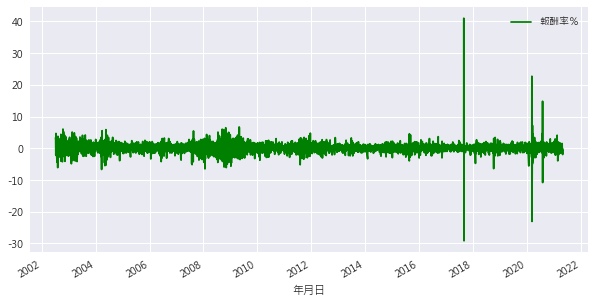

In [4]:
data.plot(x = '年月日',
          y = '報酬率％',
          color = 'green',
          figsize=(10,5))
plt.legend()

## 線性回歸

In [5]:
# 用昨天(第t-1日)的報酬率去預測今天(第t日)的報酬率
# 因前兩個位置的值為NA，故取第3個位置以後的數值
x = data['報酬率％'].shift(1)[2:].values
y = data['報酬率％'][2:].values

In [6]:
reg = np.polyfit(x,y,deg=1)
reg

array([-0.14722999,  0.06007128])

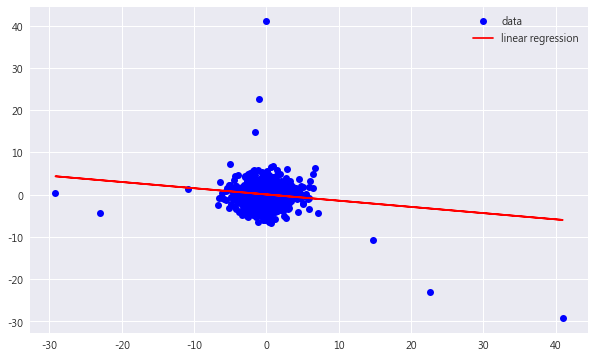

In [7]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg,x),'r',label='linear regression')
plt.legend(loc=0)

In [8]:
import statsmodels.api as sm
X2 = sm.add_constant(x) #為模型增加常數項，即迴歸線在y軸上的截距
est = sm.OLS(y, X2)
est2 = est.fit()
print (est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 05 May 2021   Prob (F-statistic):           5.61e-24
Time:                        18:36:57   Log-Likelihood:                -8686.4
No. Observations:                4652   AIC:                         1.738e+04
Df Residuals:                    4650   BIC:                         1.739e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0601      0.023      2.615      0.0

## 剛剛僅考慮了落後一期(t-1)的報酬率，這次增加至落後三期(t-2, t-3)
## 迴歸式：
$R_{t}\ = R_{t-1}+ R_{t-2}+ R_{t-3}+ e$



In [9]:
data['R_t-1'] = data['報酬率％'].shift(1)
data['R_t-2'] = data['報酬率％'].shift(2)
data['R_t-3'] = data['報酬率％'].shift(3)

In [10]:
data

,證券代碼,年月日,成交量(千股),成交值(千元),報酬率％,週轉率％,流通在外股數(千股),市值(百萬元),最後揭示買價,最後揭示賣價,...,處置股票(D),全額交割(Y),市場別,開盤價(元),最高價(元),最低價(元),收盤價(元),R_t-1,R_t-2,R_t-3
None,,,,,,,,,,,,,,,,,,,,,
0,TRI50,2002-07-04,1005846.0,36421163.0,NaN,0.6082,165372358,4354725,None,None,...,,,TSE,None,None,None,4060.93,NaN,NaN,NaN
1,TRI50,2002-07-05,1438901.0,50301305.0,3.2150,0.8668,166000957,4493067,None,None,...,,,TSE,None,None,None,4191.49,NaN,NaN,NaN
2,TRI50,2002-07-08,1521486.0,58326617.0,3.1523,0.9158,166135791,4635156,None,None,...,,,TSE,None,None,None,4323.62,3.2150,NaN,NaN
3,TRI50,2002-07-09,1036086.0,40166451.0,0.4533,0.6202,167069529,4655511,None,None,...,,,TSE,None,None,None,4343.22,3.1523,3.2150,NaN
4,TRI50,2002-07-10,838298.0,33090014.0,-2.1201,0.5012,167243829,4557943,None,None,...,,,TSE,None,None,None,4251.14,0.4533,3.1523,3.2150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,TRI50,2021-04-27,1181219.0,116535721.0,-0.0491,0.3750,314984405,30067644,None,None,...,,,TSE,None,None,None,27630.70,1.4755,1.4909,-0.2383
4650,TRI50,2021-04-28,1059279.0,104289468.0,-0.6558,0.3363,314983943,29869182,None,None,...,,,TSE,None,None,None,27449.49,-0.0491,1.4755,1.4909
4651,TRI50,2021-04-29,1430194.0,126314663.0,-0.0083,0.4541,314983943,29864684,None,None,...,,,TSE,None,None,None,27447.20,-0.6558,-0.0491,1.4755


In [11]:
x = data[['R_t-1','R_t-2','R_t-3']][4:].values
y = data['報酬率％'][4:].values

In [12]:
reg_t3 = np.linalg.lstsq(x,y, rcond=None)[0]
reg_t3

array([-0.14900102, -0.01325076, -0.01424031])

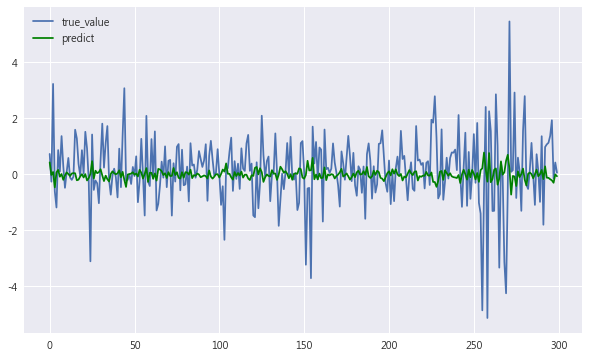

In [13]:
plt.figure(figsize=(10,6))
plt.plot(y[1000:1300],label = 'true_value')
#plt.plot((x*reg_t3).sum(axis=1)[1000:1300],label = 'predict')
plt.plot(np.dot(x, reg_t3)[1000:1300],color = 'green',label = 'predict')
plt.legend()

In [14]:
import statsmodels.api as sm
X3 = sm.add_constant(x) #為模型增加常數項，即迴歸線在y軸上的截距
est = sm.OLS(y, X3)
est2 = est.fit()
print (est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     35.53
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.07e-22
Time:                        18:37:02   Log-Likelihood:                -8679.9
No. Observations:                4650   AIC:                         1.737e+04
Df Residuals:                    4646   BIC:                         1.739e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0609      0.023      2.648      0.0

## 羅吉斯回歸

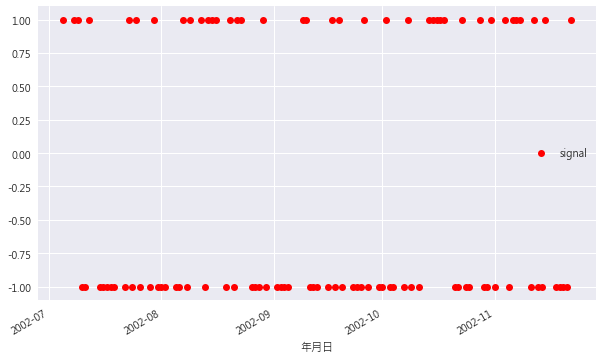

In [15]:
data['signal'] = np.sign(data['報酬率％'])
# 繪圖
data[:100].plot(x = '年月日',
                y = 'signal',
                style = 'ro',
                figsize = (10,6)
               )

In [16]:
x = data['R_t-1'][2:1000].values
y = data['signal'][2:1000].values

In [17]:
reg = np.polyfit(x, y, deg = 1)
reg

array([-0.02942639, -0.01875123])

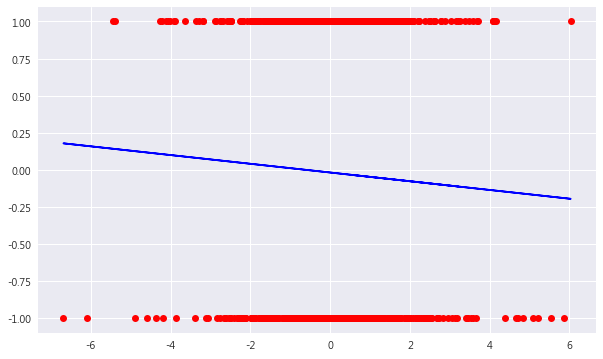

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')
plt.plot(x, np.polyval(reg, x), 'b')

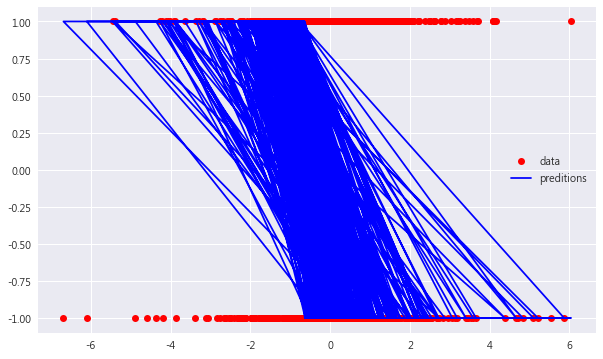

In [19]:
from sklearn import linear_model
lm = linear_model.LogisticRegression(solver = 'lbfgs')
R_t1 = x.reshape(1,-1).T
signal = y
lm.fit(R_t1,signal)
preditions = lm.predict(R_t1)
plt.figure(figsize = (10, 6))
plt.plot(x, y, 'ro', label = 'data')
plt.plot(x, preditions, 'b', label = 'preditions')
plt.legend(loc = 0)


In [20]:
from sklearn.metrics import accuracy_score
preditions = lm.predict(R_t1)
accuracy_score(preditions, y)

0.5200400801603207